## 进化算法

进化算法，也被成为是演化算法（evolutionary algorithms，简称EAs），它不是一个具体的算法，而是一个“算法簇”。进化算法产生的灵感借鉴了大自然中生物的进化操作，它一般包括基因编码，种群初始化，交叉变异算子，经营保留机制等基本操作。与传统的基于微积分的方法和穷举方法等优化算法相比，进化计算是一种成熟的具有高鲁棒性和广泛适用性的全局优化方法，具有自组织、自适应、自学习的特性，能够不受问题性质的限制，有效地处理传统优化算法难以解决的复杂问题（比如NP难优化问题）。

除了上述优点以外，进化算法还经常被用到多目标问题的优化求解中来，我们一般称这类进化算法为进化多目标优化算法（MOEAs）。目前进化计算的相关算法已经被广泛用于参数优化、工业调度、资源分配、复杂网络分析等领域。



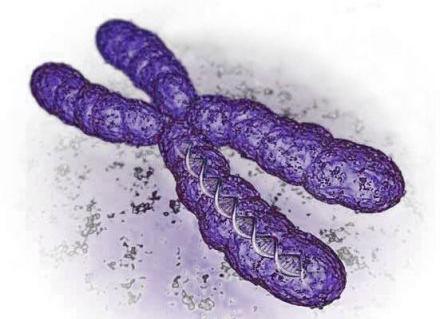

In [1]:
from IPython.display import display, Image

display(Image('evolutionary1.jpg'))

## 遗传算法

遗传算法（Genetic Algorithm，简称GA）是一种最基本的进化算法，它是模拟达尔文生物进化理论的一种优化模型，最早由J.Holland教授于1975年提出。遗传算法中种群每个个体都是解空间上的一个可行解，通过模拟生物的进化过程，从而在解空间内搜索最优解。

首先，让我们刷新自己的记忆，试着理解一下达尔文提出的自然选择。

这个理论很简单：物种想要生生不息，就得持续自我提升，适者才能生存。种群中最优秀的特质应该传递给后代，而其他个体也不能被遗忘，这样才能维持一定的多样性，自然环境发生变化时才更容易适应。这是遗传算法的理论基础。


## 优化问题

遗传算法在优化问题上特别管用。

我们来举个例子：背包问题。

这个著名的数学问题是理查德·卡普在1972年提出的。问题是这样的：

> _你有两样东西，一个设定了承重能力的背包、一些重量和价值各不相同的盒子，目标是把盒子装到背包里，在不超过重量限制的情况下，装进尽可能高的价值。_


它是一个优化问题，有很多可能方案，因此非常适合用遗传算法来解决。



遗传算法的基本操作可以用下图来描述：

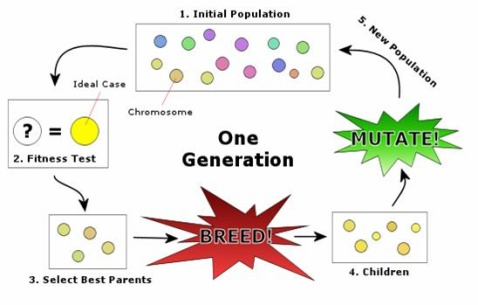

In [2]:
display(Image('evolutionary2.jpg'))

个体的编码方式确定以后，针对上图操作的具体描述如下：

　　Step 1 种群初始化：根据问题特性设计合适的初始化操作（初始化操作应尽量简单，时间复杂度不易过高），即对种群中的N个个体进行初始化操作；

　　Step 2 个体评价：根据优化的目标函数计算种群中所有个体的适应值（fitness value）；

　　Step 3 迭代设置：设置种群最大迭代次数n_iteration，并令当前迭代次数g=1；

　　Step 4 个体选择：设计合适的选择算子来对种群P(g)个体进行选择，被选择的个体将进入交配池中组成父代种群FP(g)，用于交叉变换以产生新的个体。选择策略要基于个体适应值来进行，假如要优化的问题为最小化问题，那么具有较小适应值的个体被选择的概率相应应该大一些。常用的选择策略有轮盘赌选择，锦标赛选择等。

　　Step 5 交叉算子：根据交叉概率pm（预先指定，一般为0.9）来判断父代个体是否需要进行交叉操作。交叉算子要根据被优化问题的特性来设计，它是整个遗传算法的核心，它被设计的好坏将直接决定整个算法性能的优劣。

　　Step 6 变异算子：根据变异概率pc（预先指定，一般为0.1）来判断父代个体是否需要进行变异操作。变异算子的主要作用是保持种群的多样性，防止种群陷入局部最优，所以其一般被设计为一种随机变换。

通过交叉变异操作以后父代种群FP(g)生成了新的子代种群P(g+1)，令种群迭代次数g=g+1，进行下一轮的迭代操作（跳转到Step 4），直至迭代次数达到最大的迭代次数。

为了更形象说明交叉操作的作用，我们以下图为例来深入理解一下交叉操作的作用：

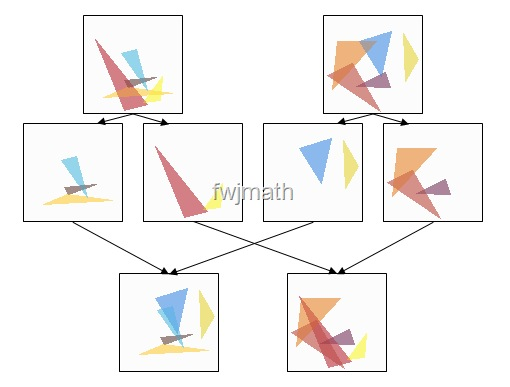

In [3]:
display(Image('evolutionary3.jpg'))

## 动手教程：用遗传算法寻找函数的最大值

为了体验这个算法，我们用它来解决一个简单的问题：求解函数 $f(x)$ 在 $x\in[a, b]$ 的最大值。

在求解之前，我们先解释一下个体是什么。在本问题中，个体其实就是 $\in[a, b]$ 中的 $x$ ， 我们的目的就是找到一个最佳的个体 $x_0$，使得 $f(x_0)$ 达到最大值。 


第一步，我们初始化一个种群：

```
def init_population(self):
    population = np.random.randint(low=0, high=2, size=(self.n_population, self.DNA_size)).astype(np.int8)
    return population
```

第二步，计算种群中每个样本的适应度值(fitness_score)，在计算种群中每个个体的fitness_score之前，我们先要提取出每个个体的DNA，在这里，我们用二进制来表示每个个体的DNA：

```
def fitness(self, population):
    transform_population = self.transformDNA(population)
    fitness_score = f(transform_population)
    return fitness_score - fitness_score.min()  # 在select函数中按照个体的适应度进行抽样的的时候，抽样概率值必须是非负的
```


第三步，进行自然选择，选出基因好的个体作为父代：

```
def select(self, population, fitness_score):
    fitness_score = fitness_score + 1e-4     # 下一步抽样的过程中用到了除法，出现除法就要考虑到分母为0的特殊情况
    idx = np.random.choice(np.arange(self.n_population), size=self.n_population, replace=True, p=fitness_score/fitness_score.sum())
    return population[idx]
```


第四步，有了父代之后，就要产生后代了：
```
def create_child(self, parent, pop):
    if np.random.rand() < self.cross_rate:
        index = np.random.randint(0, self.n_population, size=1)
        cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)
        parent[cross_points] = pop[index, cross_points]
    return parent
```


第五步，产生的后代我们还需要对该后代进行一些基因突变，目的是保证种群的多样性：

```
def mutate_child(self, child):
    for i in range(self.DNA_size):
        if np.random.rand() < self.mutate_rate:
            child[i] = 1
        else:
            child[i] = 0
    return child
```


最后一步就是开始进化了：

```
def evolution(self):
    population = self.init_population()
    for i in range(self.n_iterations):
        fitness_score = self.fitness(population)
        best_person = population[np.argmax(fitness_score)]

        if i%100 == 0:
            print(u'第%-4d次进化后, 基因(fitness_score)最好的个体是: %s, 其适应度(找到的函数最大值)是: %f' % (i, best_person, 
                                                                            f(self.transformDNA(best_person)) ) )

        population = self.select(population, fitness_score)
        population_copy = population.copy()

        for parent in population:
            child = self.create_child(parent, population_copy)
            child = self.mutate_child(child)
            parent[:] = child

        population = population

    self.best_person = best_person
```



详细代码如下：

第0   次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第100 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第200 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 1 0 0], 其适应度(找到的函数最大值)是: 1.412923
第300 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第400 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第500 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第600 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第700 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 1 0 1], 其适应度(找到的函数最大值)是: 1.410743
第800 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第900 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第1000次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第1100次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第1200次进化后, 基因(fitness_score)

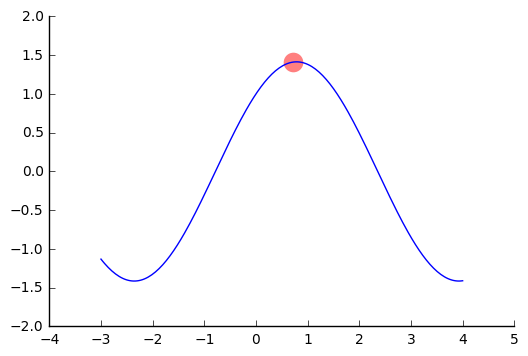

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 找到函数f(x)在区间self.x_bounder上的最大值
def f(x):
    return np.sin(x) + np.cos(x)


class GeneticAlgorithm(object):
    """遗传算法.

    Parameters:
    -----------
    cross_rate: float
        交配的可能性大小.
    mutate_rate: float
        基因突变的可能性大小. 
    n_population: int
        种群的大小.
    n_iterations: int
        迭代次数.
    DNA_size: int
        DNA的长度.
    x_bounder: list
        x 轴的区间, 用遗传算法寻找x在该区间中的最大值.
    """
    def __init__(self, cross_rate, mutation_rate, n_population, n_iterations, DNA_size):
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.n_population = n_population
        self.n_iterations = n_iterations
        self.DNA_size = 8                            # DNA的长度
        self.x_bounder = [-3, 4]
        

    # 初始化一个种群
    def init_population(self):
        population = np.random.randint(low=0, high=2, size=(self.n_population, self.DNA_size)).astype(np.int8)
        return population

    # 将种群中的每个个体的DNA由二进制转换成十进制
    def transformDNA(self, population):
        population_decimal = ( (population.dot(np.power(2, np.arange(self.DNA_size)[::-1])) / np.power(2, self.DNA_size) - 0.5) * 
                               (self.x_bounder[1] - self.x_bounder[0]) + 0.5 * (self.x_bounder[0] + self.x_bounder[1])  )
        return population_decimal

    # 计算种群中每个个体的适应度，适应度越高，说明该个体的基因越好
    def fitness(self, population):
        transform_population = self.transformDNA(population)
        fitness_score = f(transform_population)
        return fitness_score - fitness_score.min()  # 在select函数中按照个体的适应度进行抽样的的时候，抽样概率值必须是非负的

    # 对种群按照其适应度进行采样，这样适应度高的个体就会以更高的概率被选择
    def select(self, population, fitness_score):
        fitness_score = fitness_score + 1e-4     # 下一步抽样的过程中用到了除法，出现除法就要考虑到分母为0的特殊情况
        idx = np.random.choice(np.arange(self.n_population), size=self.n_population, replace=True, p=fitness_score/fitness_score.sum())
        return population[idx]

    # 进行交配
    def create_child(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            index = np.random.randint(0, self.n_population, size=1)
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)
            parent[cross_points] = pop[index, cross_points]
        return parent

    # 基因突变
    def mutate_child(self, child):
        for i in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[i] = 1
            else:
                child[i] = 0
        return child

    # 进化
    def evolution(self):
        population = self.init_population()
        for i in range(self.n_iterations):
            fitness_score = self.fitness(population)
            best_person = population[np.argmax(fitness_score)]
            
            if i%100 == 0:
                print(u'第%-4d次进化后, 基因(fitness_score)最好的个体是: %s, 其适应度(找到的函数最大值)是: %f' % (i, best_person, 
                                                                                f(self.transformDNA(best_person)) ) )
            
            population = self.select(population, fitness_score)
            population_copy = population.copy()
            
            for parent in population:
                child = self.create_child(parent, population_copy)
                child = self.mutate_child(child)
                parent[:] = child
                
            population = population
            
        self.best_person = best_person
        
def main():
    ga = GeneticAlgorithm(cross_rate=0.9, mutation_rate=0.1, n_population=300, n_iterations=2000, DNA_size=8)
    ga.evolution()
    
    # 绘图
    x = np.linspace(start=ga.x_bounder[0], stop=ga.x_bounder[1], num=200)
    plt.plot(x, f(x))
    plt.scatter(ga.transformDNA(ga.best_person), f(ga.transformDNA(ga.best_person)), s=200, lw=0, c='red', alpha=0.5)
    ax = plt.gca()
    
    ax.spines['right'].set_color('none')  # 去掉右侧的轴
    ax.spines['top'].set_color('none')    # 去掉上方的轴
    
    ax.xaxis.set_ticks_position('bottom') # 设置x轴的刻度仅在下方显示
    ax.yaxis.set_ticks_position('left')   # 设置y轴的刻度仅在左边显示
    plt.show()

if __name__ == '__main__':
    main()


参考文献： https://www.cnblogs.com/maybe2030/p/4665837.html